In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [12]:
data = pd.read_csv('clemson_results.csv', header=None)
data = data.to_numpy()

IndexError: index 13 is out of bounds for axis 0 with size 13

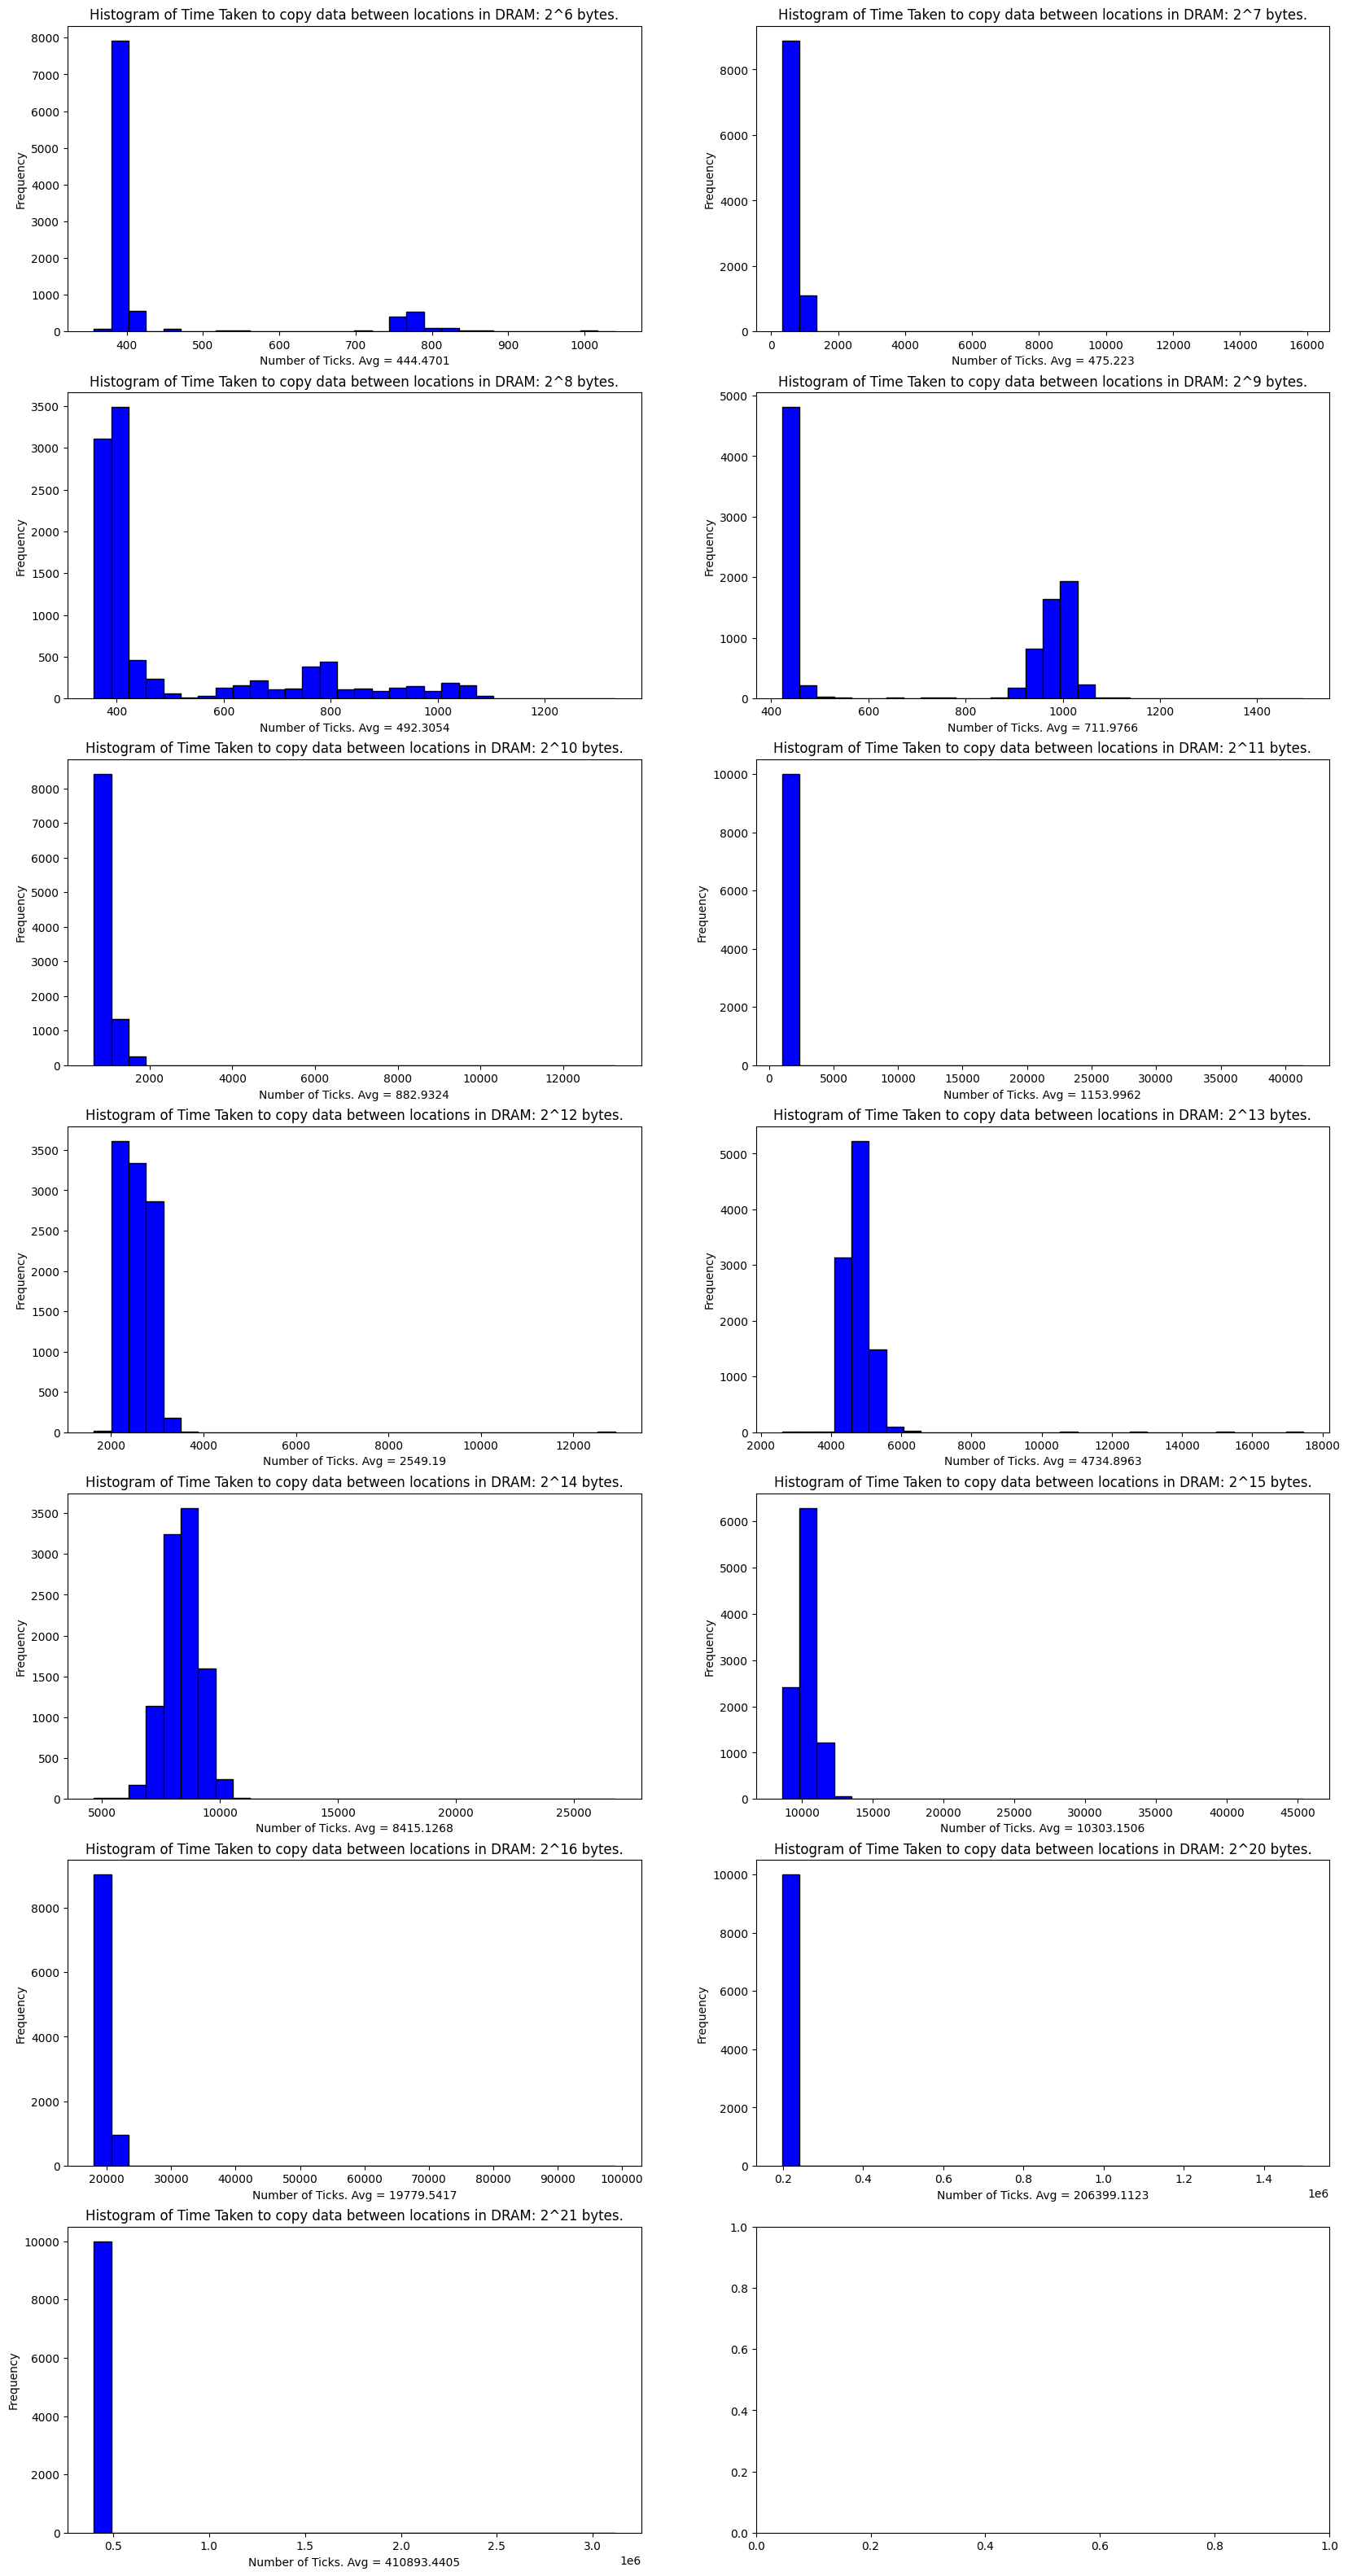

In [13]:
powers = [6,7,8,9,10,11,12,13,14,15,16,20,21]

fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(20, 40)) # 1 row, 3 columns
axes = axes.flatten()

for i in range(len(data)):

    
    #plt.hist(trial_data, bins = 50)
    #plt.ylim(0, 10000)
    #plt.title()
    #plt.xlabel('Number of Ticks')
    #plt.show()
    

    # Plot each histogram in its respective subplot
    axes[i].hist(data[i], bins=30, color='blue', edgecolor='black')
    axes[i].set_title(f"Histogram of Time Taken to copy data between locations in DRAM: 2^{powers[i]} bytes.")
    #print(f'Mean: {np.mean(trial_data)}\n \n Std: {np.std(trial_data)}\n')

# Add common labels (optional)
i = 0
for ax in axes:
    if {i < 13}:
        ax.set_xlabel(f'Number of Ticks. Avg = {np.mean(data[i])}')
        ax.set_ylabel('Frequency')
        i+= 1

# Adjust layout for better spacing
plt.show()
    
# Mask the data so that we can filter out the outlying datapoints and get better histograms
# mask = trial_data <  np.mean(trial_data) + 1.5 * np.std(trial_data)
# filtered = trial_data[mask]
# mask = filtered >  np.mean(trial_data) - 1.5 * np.std(trial_data)
# filtered = filtered[mask]
    
'''
plt.hist(filtered, bins = 50)
#plt.ylim(0, 10000)
plt.title(f"Histogram of Time Taken to copy data between locations in DRAM: 2^{powers[i]} bytes. Cleaned Data.")
plt.xlabel('Number of Ticks')
plt.show()
'''
    

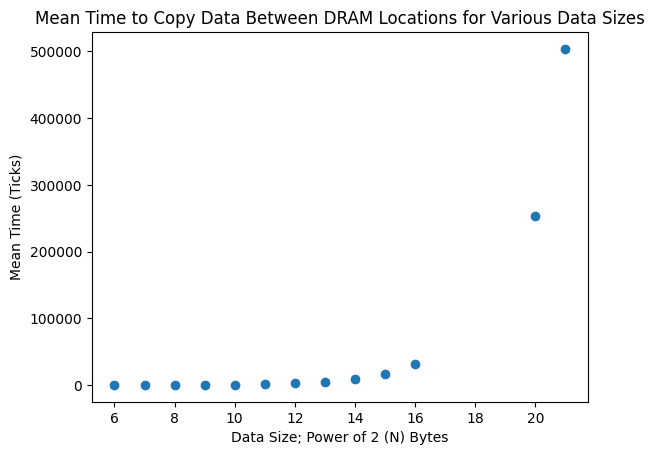

In [ ]:
d = []
for i in range(len(data)):
    d.append(np.mean(data[i]))

plt.scatter(powers,d)
plt.title(f"Mean Time to Copy Data Between DRAM Locations for Various Data Sizes")
plt.xlabel('Data Size; Power of 2 (N) Bytes')
plt.ylabel('Mean Time (Ticks)')
plt.show()

# Q 3

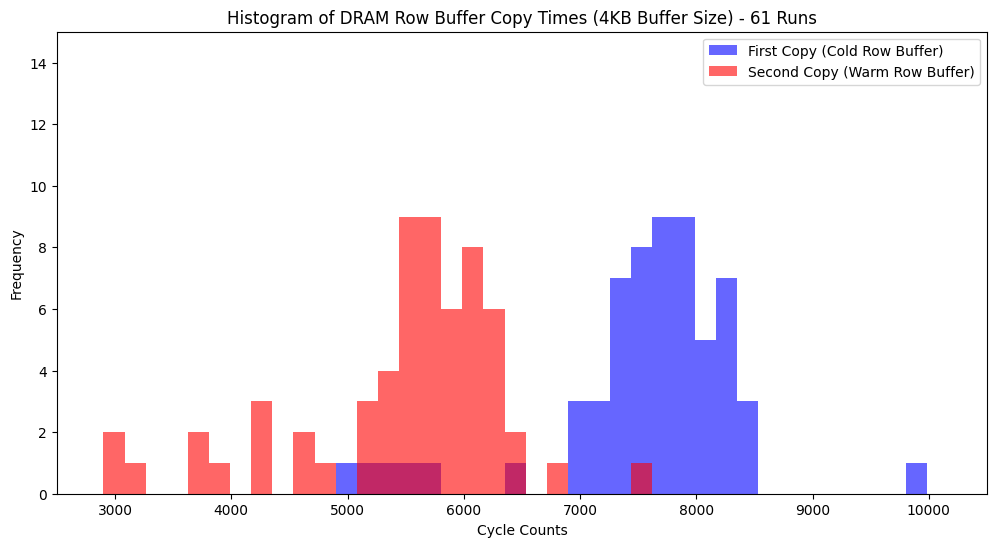

First copy - Mean: 7551.3, Std: 840.4
Second copy - Mean: 5476.7, Std: 908.9
Difference (First - Second): 2074.6 cycles
Percent difference: 27.47%

This suggests OPEN-ROW policy

Paired t-test results:
t-statistic: 21.231
p-value: 1.36e-29
Statistically significant difference: Yes

Paired t-test results:
t-statistic: 21.231
p-value: 1.36e-29
Statistically significant difference: Yes


In [11]:
# Data: measured cycles for first and second copy times from 58 experimental runs
first_copy_times = [8390, 7544, 7332, 7996, 7476, 7762, 8194, 8276, 7906, 8002, 
                   7872, 7434, 8002, 7526, 4910, 7284, 5496, 7802, 6960, 5648, 
                   7624, 6486, 7196, 7156, 7342, 5102, 7462, 8194, 7420, 7526, 
                   7538, 7314, 7858, 7634, 8146, 7794, 7458, 8402, 7968, 7648, 
                   7036, 7468, 7990, 7976, 8322, 6972, 7780, 8316, 5296, 7178, 
                   8302, 7822, 8184, 7322, 7682, 7914, 7910, 9984, 8528, 7852, 7714]

second_copy_times = [5462, 5996, 5812, 6012, 6032, 5256, 5738, 6028, 5100, 5118, 
                    6136, 6274, 5610, 5664, 3668, 5924, 3822, 6398, 5566, 2900, 
                    6334, 4272, 5794, 5774, 6770, 4184, 5616, 6108, 5684, 6034, 
                    5942, 5680, 4568, 5606, 6300, 5990, 3076, 6286, 5796, 6288, 
                    5918, 5856, 5438, 5412, 5546, 5298, 5926, 6388, 3672, 5502, 
                    5686, 4304, 4582, 3142, 5288, 5540, 5582, 7606, 5646, 4786, 6344]

# Define consistent bins for both datasets
# Using the full range from min to max of both datasets
min_val = min(min(first_copy_times), min(second_copy_times))
max_val = max(max(first_copy_times), max(second_copy_times))
bins = np.linspace(min_val, max_val, 40)  # 40 bins across the full range

# Plot histogram with two overlapping datasets with consistent bins
plt.figure(figsize=(12, 6))
plt.hist(first_copy_times, bins=bins, alpha=0.6, color='blue', label='First Copy (Cold Row Buffer)')
plt.hist(second_copy_times, bins=bins, alpha=0.6, color='red', label='Second Copy (Warm Row Buffer)')

plt.xlim(2500, 10500)
plt.ylim(0, 15)

# Adding labels and title
plt.xlabel('Cycle Counts')
plt.ylabel('Frequency')
plt.title('Histogram of DRAM Row Buffer Copy Times (4KB Buffer Size) - 61 Runs')
plt.legend()

# Show plot
plt.show()

# Calculate and display statistics
first_mean = np.mean(first_copy_times)
second_mean = np.mean(second_copy_times)
difference = first_mean - second_mean
percent_diff = (difference / first_mean) * 100

print(f"First copy - Mean: {first_mean:.1f}, Std: {np.std(first_copy_times):.1f}")
print(f"Second copy - Mean: {second_mean:.1f}, Std: {np.std(second_copy_times):.1f}")
print(f"Difference (First - Second): {difference:.1f} cycles")
print(f"Percent difference: {percent_diff:.2f}%")
print(f"\nThis suggests {'OPEN-ROW' if percent_diff > 10 else 'CLOSED-ROW or minimal row buffer effect'} policy")

# Additional analysis: paired t-test
from scipy import stats
t_stat, p_value = stats.ttest_rel(first_copy_times, second_copy_times)
print(f"\nPaired t-test results:")
print(f"t-statistic: {t_stat:.3f}")
print(f"p-value: {p_value:.2e}")
print(f"Statistically significant difference: {'Yes' if p_value < 0.05 else 'No'}")